In [3]:
import pickle
import os
from typing import List, Dict, Tuple

EXP_DS = 'cifar10_rand_d20_CK10'
EXPERIMENTS = []
for day in os.listdir('outputs'):
    if day.startswith('.'):
        continue
    for exp in os.listdir(os.path.join('outputs', day)):
        if exp.startswith('.'):
            continue
        if 'results.pkl' in os.listdir(os.path.join('outputs', day, exp, EXP_DS)):
            EXPERIMENTS.append('{}/{}'.format(day, exp))

data = []
results: Dict[str, Tuple[int, List[float], List[float]]] = {}
for exp in EXPERIMENTS:
    file_path = 'outputs/{}/{}/results.pkl'.format(exp, EXP_DS)
    with open(file_path, 'rb') as file:
        data.append(pickle.load(file))
    latest_acc = [tup[1] for tup in data[-1]['history'].metrics_centralized['accuracy']]
    latest_loss = [tup[1] for tup in data[-1]['history'].losses_centralized]
    results[exp] = (len(latest_acc), latest_acc, latest_loss)

print(results)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2025-03-08/12-23-34/cifar10_rand_d20_CK10'

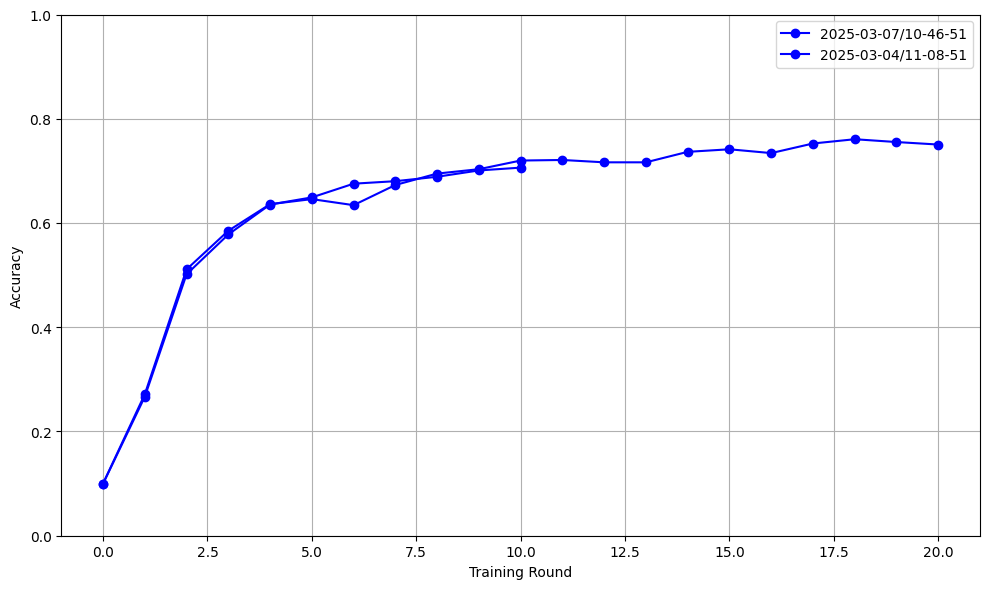

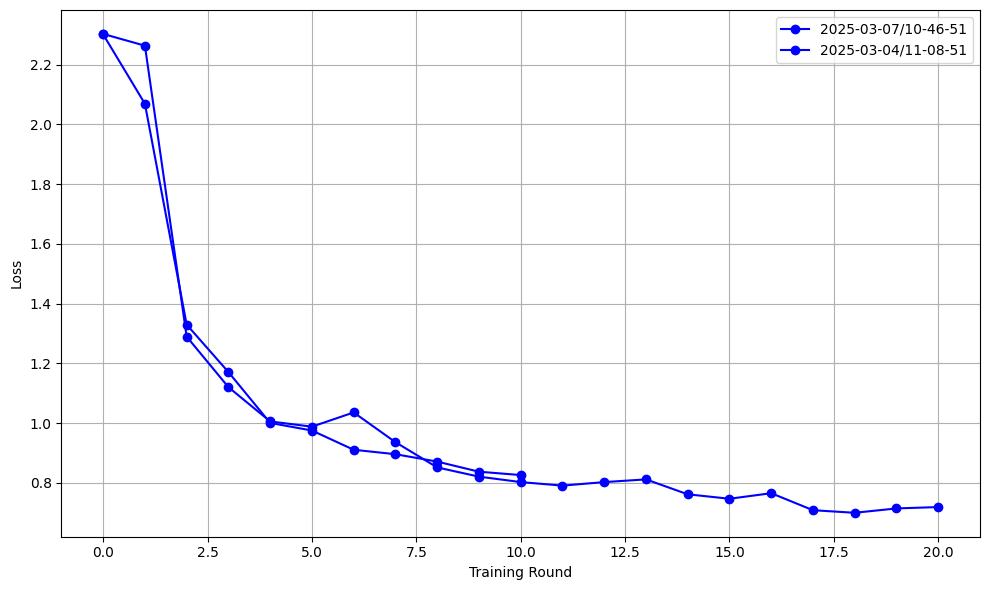

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for exp in EXPERIMENTS:
    plt.plot(range(results[exp][0]), results[exp][1], marker='o', color='b', label=exp)

plt.xlabel('Training Round')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('plot_accuracy.png', format='png')
plt.show()

plt.figure(figsize=(10, 6))
for exp in EXPERIMENTS:
    plt.plot(range(results[exp][0]), results[exp][2], marker='o', color='b', label=exp)

plt.xlabel('Training Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('plot_loss.png', format='png')
plt.show()